In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2

 MNIST DATASET
 Training samples=60000 and Testing samples=10000

In [93]:
# loading the mnist dataset
mnist=tf.keras.datasets.mnist

In [94]:
#dividing the dataset into training and testing samples
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


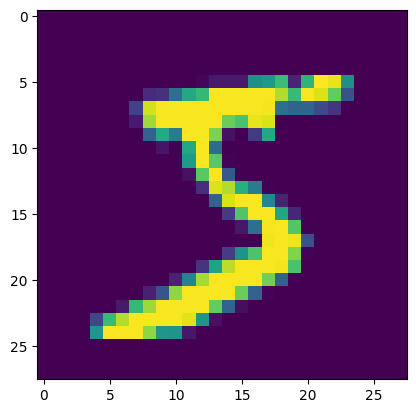

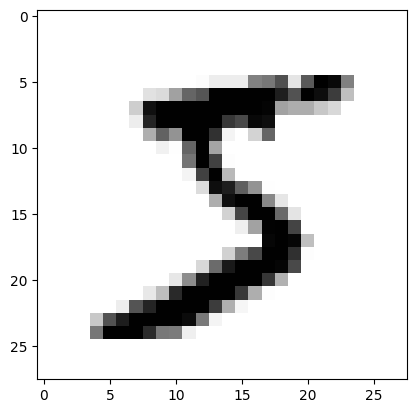

In [95]:
#checking the data
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)#converting the image to binary

In [96]:
#checking the values of each pixel before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

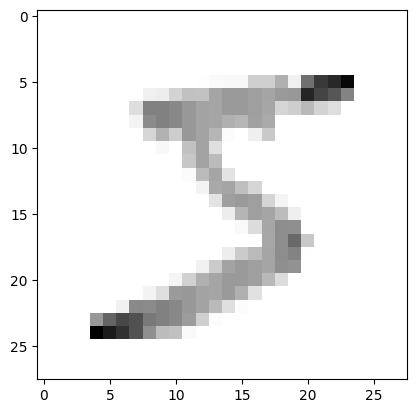

In [97]:
# normalizing the data
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [98]:
#After normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [99]:
print(y_train[0])

5


In [100]:
#resizing the image for convolution
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)# increasing one dimension for kernal operation
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training sample dimension: ",x_trainr.shape)
print("Testing sample dimension: ",x_testr.shape)

Training sample dimension:  (60000, 28, 28, 1)
Testing sample dimension:  (10000, 28, 28, 1)


In [101]:
# Creating the deep neural network
# # training the 60000 samples from the mnist dataset
model=Sequential()

#1st convolution layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))#activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling single max value of the 2,2 matrix

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))#activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling single max value of the 2,2 matrix

#3rd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))#activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling single max value of the 2,2 matrix

#1st Fully connected layer
model.add(Flatten())# Flattening from 2D to 1D before using the fully connected layer 
model.add(Dense(64))
model.add(Activation("relu"))

#2nd Fully connected layer
model.add(Dense(32))
model.add(Activation("relu"))

#Final Fully connected layer
model.add(Dense(10))# output is equal to the number of classes i.e. 10(0,9)
model.add(Activation("softmax"))




e:\tensorflow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
print("Total training samples: ", len(x_trainr))

Total training samples:  60000


In [104]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [105]:
#training the model
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.7883 - loss: 0.6721 - val_accuracy: 0.9575 - val_loss: 0.1441
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9629 - loss: 0.1207 - val_accuracy: 0.9726 - val_loss: 0.0945
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9759 - loss: 0.0769 - val_accuracy: 0.9722 - val_loss: 0.0900
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9809 - loss: 0.0601 - val_accuracy: 0.9805 - val_loss: 0.0650
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9782 - val_loss: 0.0746


In [106]:
test_loss, test_acc=model.evaluate(x_testr, y_test)
print("Test loss on 10000 samples: ", test_loss)
print("Validation Accuracy on 10000 samples: ", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9749 - loss: 0.0918
Test loss on 10000 samples:  0.07480931282043457
Validation Accuracy on 10000 samples:  0.9796000123023987


In [107]:
predictions=model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [108]:
print(predictions)

[[4.51470305e-06 5.80845190e-05 1.53592162e-04 ... 9.99781787e-01
  1.12549685e-07 8.23135395e-07]
 [2.18598274e-04 1.86833076e-05 9.99741852e-01 ... 1.74463491e-06
  2.47006469e-08 8.21893821e-07]
 [9.93382230e-08 9.99978542e-01 7.23377184e-07 ... 8.12779308e-06
  4.16257322e-08 2.34181581e-08]
 ...
 [2.27118608e-06 6.56185293e-05 2.12424184e-05 ... 6.15902609e-05
  4.14797796e-06 1.94836794e-05]
 [6.95730159e-06 9.73405818e-08 1.77216530e-09 ... 5.17151877e-10
  2.84248788e-04 7.69299277e-06]
 [1.51337532e-04 3.06921829e-05 4.09953238e-04 ... 1.83467159e-06
  1.97965943e-04 8.14883388e-05]]


In [109]:
print(np.argmax(predictions[0]))

7


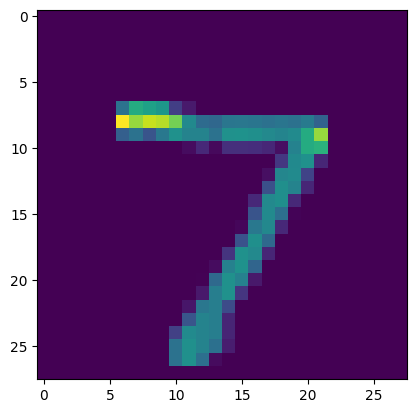

In [110]:
plt.imshow(x_test[0])
plt.show()

4


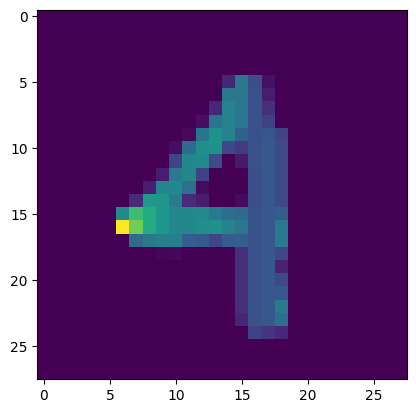

In [111]:
print(np.argmax(predictions[712]))
plt.imshow(x_test[712])
plt.show()

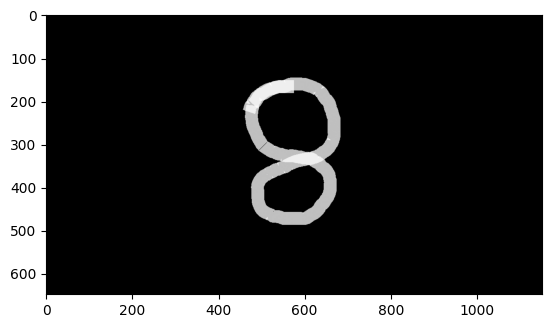

In [130]:
img=cv2.imread("8.png")
plt.imshow(img)

In [131]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting to gray scale
resized=cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA) #Reducing size of the image to 28x28

In [132]:
resized.shape

(28, 28)

In [133]:
newimg=tf.keras.utils.normalize(resized, axis=1)
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)
newimg.shape

(1, 28, 28, 1)

In [134]:
pred=model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [135]:
print(np.argmax(pred))

8
